In [1]:
import graph_tool.all as gt
import numpy as np

## Restrictions on Graph Generation
In order that a graph G = (V, E, d, w) have well-defined physical meaning
as a circuit, we place nonnegativity restrictions on the propagation delays
d(v) and the register counts w(e):

D1. The propagation delay d(v) is nonnegative for each vertex v belonging to V.

W1. The register count w(e) is a nonnegative integer for each edge e belonging to E.
We also impose the restriction that there be no directed cycles of zero weight:

W2. In any directed cycle of G, there is some edge with (strictly) positive
register count.

In [146]:
def sample_k(): #Sample to generate the In and Out Degree of each node in the graph. 
    #Taken from Graph-Tool documentation: A degree sampler function which is called without arguments, and returns a 
    #tuple of ints representing the in and out-degree of a given vertex (or a single int for undirected graphs, 
    #representing the out-degree).
    inOutDegree = np.random.randint(maxNodeDegree, size=2)
    if (inOutDegree[0] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[0] = 1
    if (inOutDegree[1] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[1] = 1
    return inOutDegree

In [165]:
def graphGenerator(nodes_size, delayRange=None, simpleDelayArray=True, simpleWeights=True, seed=None):
    #The following function generates a random graph with the following inputs:
    #nodes_size: number of vertices/nodes in the graph.
    #delayRange: specifies the range from [0-delayRange] in order to create an array of propagation delay.
    #simpleDelayArray: if it's true, the propagation delay of each index will be equal to the index of the vertex.
    #seed: a certain seed can be stated in order for the results to be totally reproducible. 
    #In order to do a quick test of the graph generator, the default values for a graph generation is to create
    #a graph with simple (random) values for the weight and simple values for the propagation delay of the index.
    
    if(seed!= None): #In order to make our data reproducible, we put a certain seed. 
            
        gt.seed_rng(seed)

        np.random.seed(seed)
        
    g = gt.random_graph(nodes_size, sample_k) #Execute graph_tool random graph generator with a certain numbers of nodes and
                                              #the sample_k
    
    edge_weight = g.new_edge_property("double") #Add a property to each edge of the graph.
    g.edge_properties["weight"] = edge_weight   #Rename that property to use it in the code as: g.ep.weight
    cap = g.new_vertex_property("int")          #Add a property to each vertex of the graph.
    g.vertex_properties["cap"] = cap            #Rename that property to use it in the code as: g.vp.cap
    
    #Note: the name "cap" was used as a placeholder of "propagation delay" since it's similar to a flow problem.
    #The name is just for intuitive purposes and doesn't change the internal logic of any algorithm. 

    if (simpleWeights): #If it's true, the weight of an edge will be a random positive number. 
        
        for edge in g.edges():
            g.ep.weight[edge] = np.random.randint(3, size=1)[0] 

    if (simpleDelayArray): #If it's true, the propagation delay array d(v) will be the index of the node. e.g d(0) = 0; d(4) = 4
            
        for vertex in g.vertices(): #Simple propagation delay creation. 
            g.vp.cap[vertex] = int(vertex)
        
    for c in gt.all_circuits(g): #We do this validation in order to respect constraint W2.
        #print(c) Print each cycle of the graph. 
        pathSum = 0
        for item in range(len(c)-1):
            pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
            #print(pathSum)
        #Final edge sum: (edge(initial node of the cycle,last node before initial node))
        pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
        if(pathSum == 0): #If a cycle with zero weight is found.
            print("Cycle with Zero weight detected!")
            g.ep.weight[g.edge(c[item+1],c[0])] = 1 #Add 1 to the last edge in order to make it different from 0.
                                                    #This is a simply solution in order to not violate constraint W2. 
            print("Edge: %s modificated with value 1!" % (g.edge(c[item+1],c[0])))
        else:
            print("Path SUM: %s" % (pathSum))
    
    gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight) #Graph the draw for visualization.
    return g
    
    #delayArray = np.random.randint(delayRange, size=nodes_size)

Path SUM: 1.0
Path SUM: 4.0
Path SUM: 6.0
Path SUM: 6.0
Path SUM: 9.0
Path SUM: 1.0
Path SUM: 4.0
Path SUM: 3.0
Path SUM: 5.0


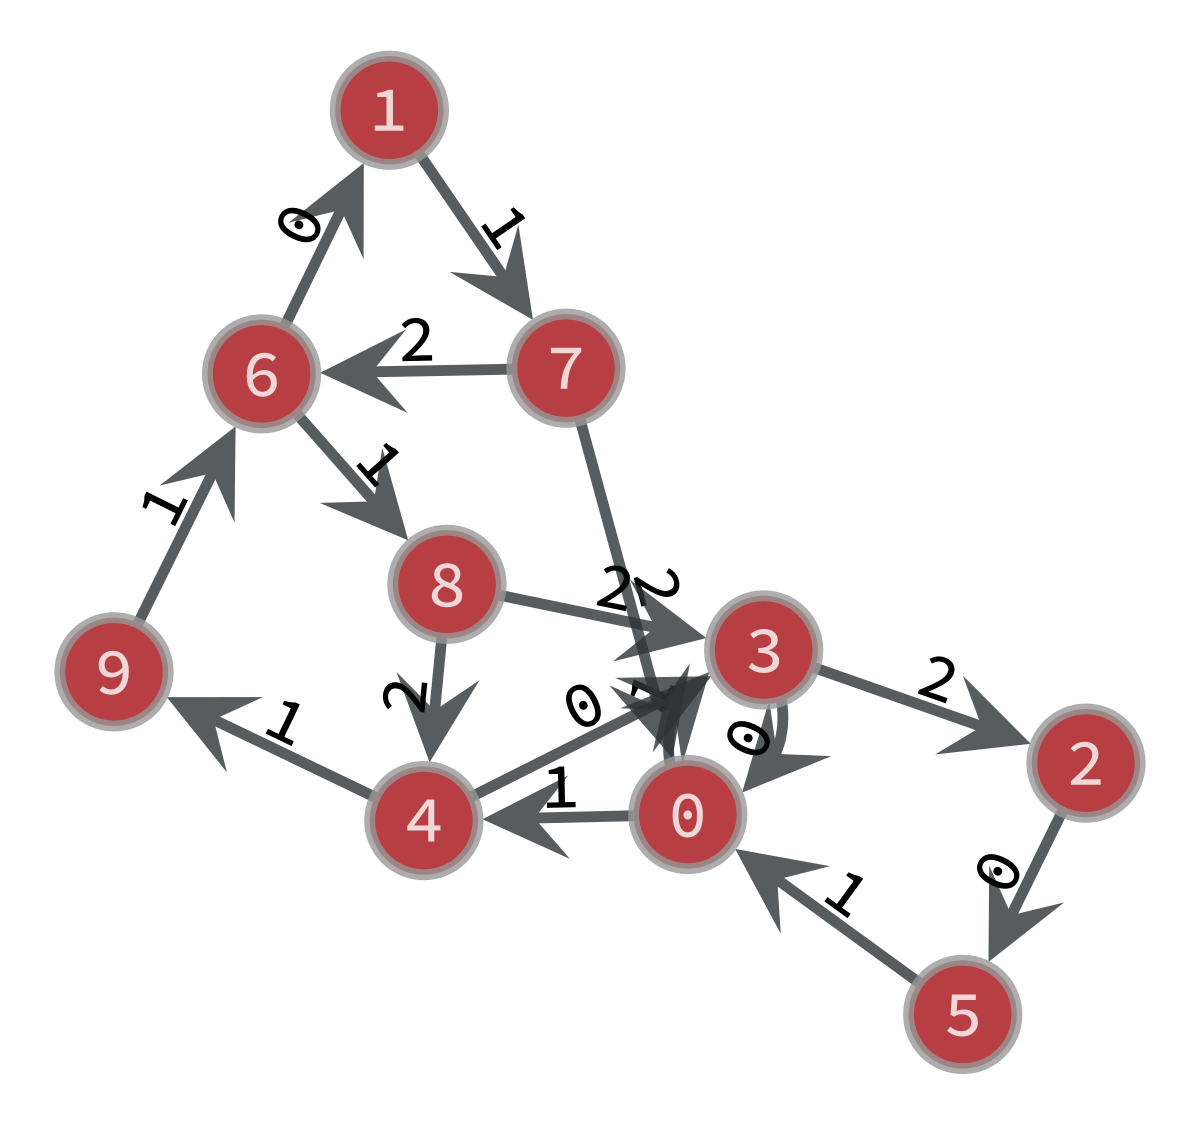

In [166]:
maxNodeDegree = 4 #Due to design decisions of the team of Graph-Tool, we are forced to declare the Max Node degree outside 
                  #of the generator in order to be used with the sample_k function. 
generatedGraph = graphGenerator(10)

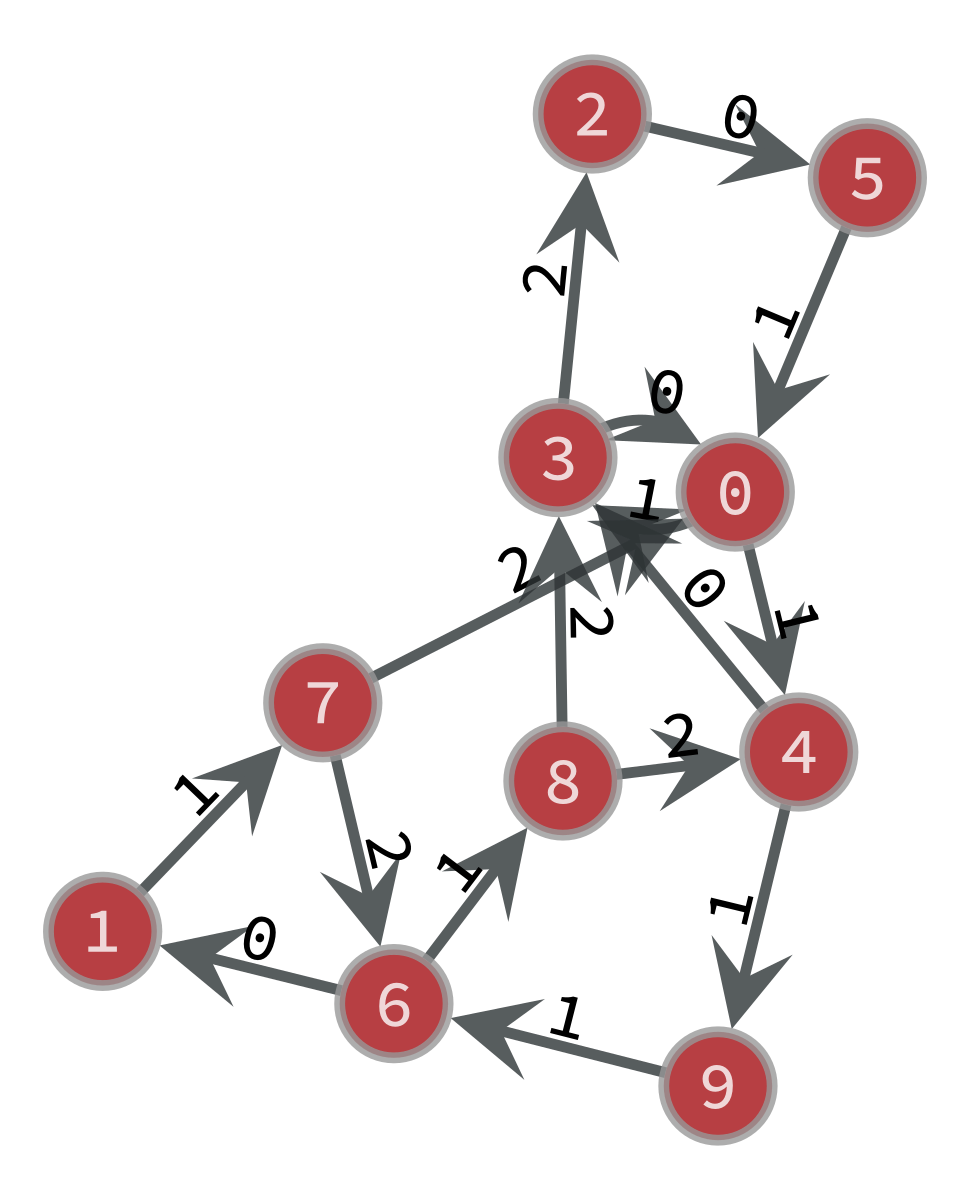

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f86c80d5b20, at 0x7f86c8b89430>

In [167]:
g = gt.Graph(generatedGraph)
gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight)

In [168]:
g.save("generatedGraph2.xml.gz")

In [145]:
#gt.seed_rng(14)

#np.random.seed(14)

g = gt.random_graph(7, sample_k)

print(g)
print(g.num_edges())
edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight

<Graph object, directed, with 7 vertices and 15 edges, at 0x7f86c3f49400>
15


In [161]:
#LA PRUEBA DE FUEGO
for i in range(1000):
    g = gt.random_graph(7, sample_k)
    print(g)
    print(g.num_edges())
    edge_weight = g.new_edge_property("double")
    g.edge_properties["weight"] = edge_weight
    for edge in g.edges():
    #print(edge)
        g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
    #print(g.ep.weight[edge])

    cap = g.new_vertex_property("int")
    g.vertex_properties["cap"] = cap 

    for vertex in g.vertices():
        g.vp.cap[vertex] = int(vertex)
    for c in gt.all_circuits(g):
        print(c)
        pathSum = 0
        for item in range(len(c)-1):
            pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
            print(pathSum)
        #Final edge sum: (edge(initial node of the cycle,last node before initial node))
        pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
        if(pathSum == 0):
            print("Cycle with Zero weight detected!")
            g.ep.weight[g.edge(c[item+1],c[0])] = 1
            print("Edge: %s modificated with value 1!" % (g.edge(c[item+1],c[0])))
        else:
            print("Path SUM: %s" % (pathSum))

<Graph object, directed, with 7 vertices and 12 edges, at 0x7f86c82897f0>
12
[0 4 3 2 1]
1.0
3.0
3.0
5.0
Path SUM: 7.0
[0 4 3 2 5 1]
1.0
3.0
3.0
5.0
5.0
Path SUM: 7.0
[0 4 3 2 6 1]
1.0
3.0
3.0
4.0
5.0
Path SUM: 7.0
[1 4 3 2]
1.0
3.0
3.0
Path SUM: 5.0
[1 4 3 2 5]
1.0
3.0
3.0
5.0
Path SUM: 5.0
[1 4 3 2 6]
1.0
3.0
3.0
4.0
Path SUM: 5.0
[1 2]
2.0
Path SUM: 4.0
[1 2 5]
2.0
4.0
Path SUM: 4.0
[1 2 6]
2.0
3.0
Path SUM: 4.0
[2 6 4 3]
1.0
1.0
3.0
Path SUM: 3.0
<Graph object, directed, with 7 vertices and 12 edges, at 0x7f86c8e318e0>
12
[0 3 1 6]
2.0
3.0
5.0
Path SUM: 5.0
[0 3 1 6 5]
2.0
3.0
5.0
5.0
Path SUM: 6.0
[0 3 1 6 5 2 4]
2.0
3.0
5.0
5.0
7.0
7.0
Path SUM: 8.0
[1 6]
2.0
Path SUM: 3.0
[2 6 5]
0.0
0.0
Path SUM: 2.0
[5 6]
2.0
Path SUM: 2.0
<Graph object, directed, with 7 vertices and 10 edges, at 0x7f86cc3fbc40>
10
[0 1]
0.0
Cycle with Zero weight detected!
Edge: (1, 0) modificated with value 1!
[0 5 2 3 6 1]
2.0
2.0
2.0
4.0
6.0
Path SUM: 7.0
[2 3 6 4 5]
0.0
2.0
3.0
5.0
Path SUM: 5.0
[2 4 5]
0

In [122]:
for edge in g.edges():
    #print(edge)
    g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
    #print(g.ep.weight[edge])

cap = g.new_vertex_property("int")
g.vertex_properties["cap"] = cap 

for vertex in g.vertices():
    g.vp.cap[vertex] = int(vertex)

In [123]:
for c in gt.all_circuits(g):
    print(c)
    pathSum = 0
    for item in range(len(c)-1):
        pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
        print(pathSum)
    #Final edge sum: (edge(initial node of the cycle,last node before initial node))
    pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
    if(pathSum == 0):
        print("Cycle with Zero weight detected!")
    else:
        print("Path SUM: %s" % (pathSum))

[0 5 2]
0.0
2.0
Path SUM: 3.0
[0 5 4 2]
0.0
0.0
2.0
Path SUM: 3.0
[0 6 4 2]
1.0
3.0
5.0
Path SUM: 6.0
[1 6 4 3]
0.0
2.0
4.0
Path SUM: 6.0


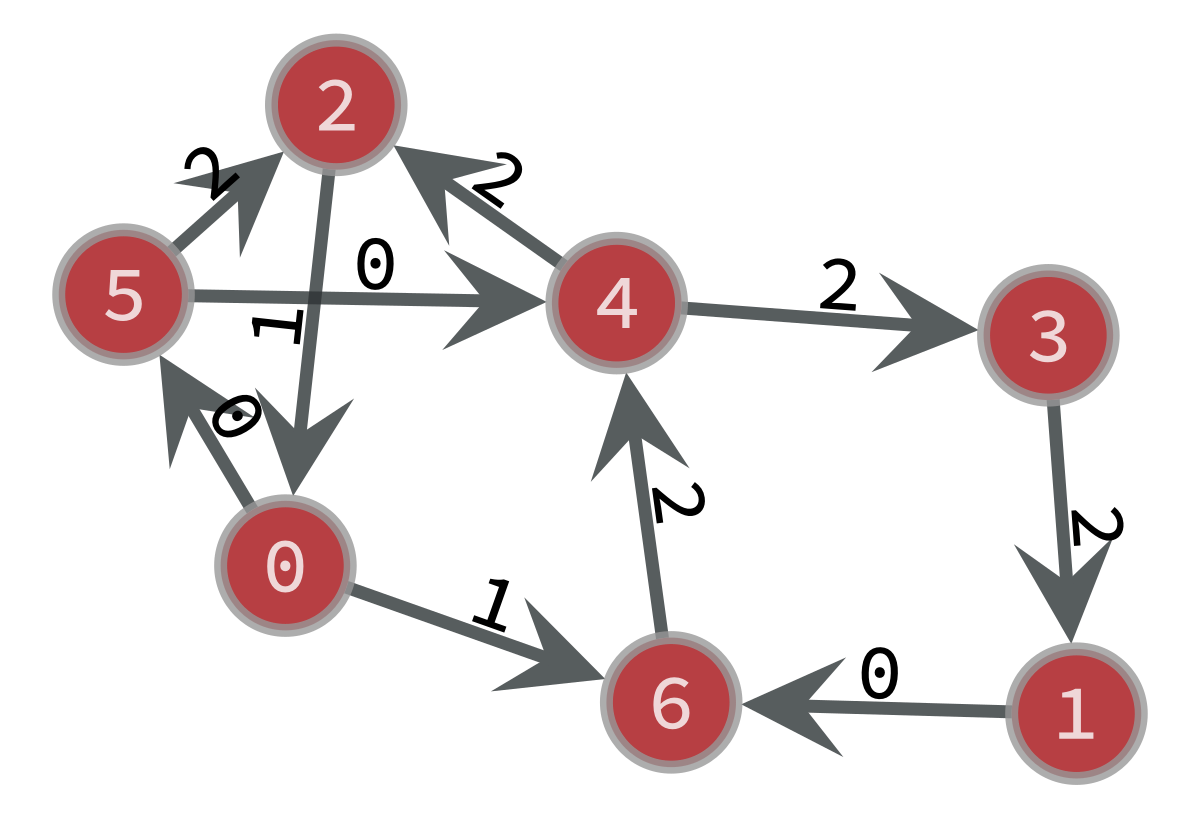

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f86cc3ee4c0, at 0x7f86cc3fb070>

In [124]:
gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight)

In [98]:
#Save a Graph
g.save("my_graph2.xml.gz")